## Final Project Submission

* Student: Arinze Iwunze
* Student pace: full time
* Scheduled project review date/time: 5/8/2020 @2pm CT
* Instructor: Rafael Carrasco
* Blog post: https://github.com/ariavathlete/dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320/blob/master/How%20To%20Break%20The%20Box%20Office.pdf


## Questions

* What are the most lucrative genre combinations?
* Who are the top 5 writers, producers, and directors for top 3 genres?  
* What's the relationship between the age of a crew member and the rating of a movie? 
* What's the relationship between the gender of the protagonist in an action movie and the gross revenue of that movie?
* What's the relationship between the length of a movie and the gross revenue/rating of that movie?
* What's the relationship between the movie release month and the gross revenue/rating of a movie?

In [219]:
# Importing the neccessary libraries plus the data from Rotten Tomatoes & TheMovieDB.org 

import gzip
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', error_bad_lines=False)

tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', error_bad_lines=False)

rt1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip',error_bad_lines=False, delimiter='\t',encoding='ISO-8859-1')

rt2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip',error_bad_lines=False, delimiter='\t',encoding='ISO-8859-1')

In [221]:
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [11]:
# Importing the data from Box Office Mojo

gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', error_bad_lines=False)

In [12]:
# Importing the data from IMDB

imdb1 = pd.read_csv('zippedData\imdb.title.crew.csv.gz', compression='gzip', error_bad_lines=False)
imdb2 = pd.read_csv('zippedData\imdb.title.ratings.csv.gz', compression='gzip', error_bad_lines=False)
imdb3 = pd.read_csv('zippedData\imdb.title.basics.csv.gz', compression='gzip', error_bad_lines=False)
imdb4 = pd.read_csv('zippedData\imdb.title.principals.csv.gz', compression='gzip', error_bad_lines=False)
imdb5 = pd.read_csv('zippedData\imdb.title.akas.csv.gz', compression='gzip', error_bad_lines=False)
imdb6 = pd.read_csv('zippedData\imdb.name.basics.csv.gz', compression='gzip', error_bad_lines=False)
imdb5 = pd.read_csv('zippedData\imdb.title.akas.csv.gz', compression='gzip', error_bad_lines=False)
imdb6 = pd.read_csv('zippedData\imdb.name.basics.csv.gz', compression='gzip', error_bad_lines=False)

In [13]:
# merging all the data from rotten tomatoes into one big data frame

rt = pd.merge(rt1, rt2, how='inner', on='id')
rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [224]:
# merging all the data from tmdb into one big data frame

tnbudget = pd.merge(tn, tmdb, how='inner', on='id')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [15]:
# merging all the data from imdb into one big data frame

imdb = pd.merge(pd.merge((pd.merge(pd.merge((pd.merge(imdb1, imdb2, how='inner', on='tconst')), imdb3, how='inner', on='tconst'), imdb4, how='inner', on = 'tconst')), imdb6, how='inner', on='nconst'), imdb5, how='inner', left_on = 'tconst', right_on='title_id')

In [16]:
# merging all the data from imdb and  from Box Office Mojo into one big data frame

imdbandgross = pd.merge(imdb, gross, how='inner', left_on = 'primary_title', right_on='title')

In [17]:
imdbandgross

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,...,region,language,types,attributes,is_original_title,title_y,studio,domestic_gross,foreign_gross,year
0,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,UA,NaN,NaN,NaN,0.0,Seven Psychopaths,CBS,15000000.0,4400000,2012
1,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,RS,NaN,NaN,NaN,0.0,Seven Psychopaths,CBS,15000000.0,4400000,2012
2,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,GR,NaN,NaN,transliterated ISO-LATIN-1 title,0.0,Seven Psychopaths,CBS,15000000.0,4400000,2012
3,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,NaN,NaN,original,NaN,1.0,Seven Psychopaths,CBS,15000000.0,4400000,2012
4,tt1931533,nm1732981,nm1732981,7.2,223493,Seven Psychopaths,Seven Psychopaths,2012,110.0,"Comedy,Crime",...,PL,NaN,working,NaN,0.0,Seven Psychopaths,CBS,15000000.0,4400000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540492,tt2406422,nm0809166,NaN,7.3,269,Walking the Camino: Six Ways to Santiago,Walking the Camino: Six Ways to Santiago,2013,84.0,"Adventure,Documentary",...,SE,NaN,imdbDisplay,NaN,0.0,Walking the Camino: Six Ways to Santiago,FEF,613000.0,NaN,2013
540493,tt2406422,nm0809166,NaN,7.3,269,Walking the Camino: Six Ways to Santiago,Walking the Camino: Six Ways to Santiago,2013,84.0,"Adventure,Documentary",...,ES,NaN,imdbDisplay,NaN,0.0,Walking the Camino: Six Ways to Santiago,FEF,613000.0,NaN,2013
540494,tt2406422,nm0809166,NaN,7.3,269,Walking the Camino: Six Ways to Santiago,Walking the Camino: Six Ways to Santiago,2013,84.0,"Adventure,Documentary",...,FR,NaN,imdbDisplay,NaN,0.0,Walking the Camino: Six Ways to Santiago,FEF,613000.0,NaN,2013
540495,tt2406422,nm0809166,NaN,7.3,269,Walking the Camino: Six Ways to Santiago,Walking the Camino: Six Ways to Santiago,2013,84.0,"Adventure,Documentary",...,US,NaN,NaN,NaN,0.0,Walking the Camino: Six Ways to Santiago,FEF,613000.0,NaN,2013


In [18]:
imdbandgross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540497 entries, 0 to 540496
Data columns (total 33 columns):
tconst                540497 non-null object
directors             540443 non-null object
writers               534693 non-null object
averagerating         540497 non-null float64
numvotes              540497 non-null int64
primary_title         540497 non-null object
original_title        540497 non-null object
start_year            540497 non-null int64
runtime_minutes       539961 non-null float64
genres                540383 non-null object
ordering_x            540497 non-null int64
nconst                540497 non-null object
category              540497 non-null object
job                   210639 non-null object
characters            216594 non-null object
primary_name          540497 non-null object
birth_year            347767 non-null float64
death_year            13393 non-null float64
primary_profession    538054 non-null object
known_for_titles      539784 non-n

In [19]:
print(gross.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [20]:
print(rt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
id              54432 non-null int64
synopsis        54300 non-null object
rating_x        54346 non-null object
genre           54345 non-null object
director        48992 non-null object
writer          45206 non-null object
theater_date    53206 non-null object
dvd_date        53206 non-null object
currency        33310 non-null object
box_office      33310 non-null object
runtime         53594 non-null object
studio          40125 non-null object
review          48869 non-null object
rating_y        40915 non-null object
fresh           54432 non-null object
critic          51710 non-null object
top_critic      54432 non-null int64
publisher       54123 non-null object
date            54432 non-null object
dtypes: int64(2), object(17)
memory usage: 8.3+ MB
None


In [21]:
print(tnbudget.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 15 columns):
id                   344 non-null int64
release_date_x       344 non-null object
movie                344 non-null object
production_budget    344 non-null object
domestic_gross       344 non-null object
worldwide_gross      344 non-null object
Unnamed: 0           344 non-null int64
genre_ids            344 non-null object
original_language    344 non-null object
original_title       344 non-null object
popularity           344 non-null float64
release_date_y       344 non-null object
title                344 non-null object
vote_average         344 non-null float64
vote_count           344 non-null int64
dtypes: float64(2), int64(3), object(10)
memory usage: 43.0+ KB
None


In [22]:
# checking for missing values

for col in imdb.columns:
    missingpt = np.mean(imdb[col].isnull())
    print('{} - {}%'.format(col, round(missingpt*100)))

tconst - 0.0%
directors - 0.0%
writers - 6.0%
averagerating - 0.0%
numvotes - 0.0%
primary_title - 0.0%
original_title - 0.0%
start_year - 0.0%
runtime_minutes - 4.0%
genres - 0.0%
ordering_x - 0.0%
nconst - 0.0%
category - 0.0%
job - 73.0%
characters - 61.0%
primary_name - 0.0%
birth_year - 56.0%
death_year - 98.0%
primary_profession - 2.0%
known_for_titles - 1.0%
title_id - 0.0%
ordering_y - 0.0%
title - 0.0%
region - 16.0%
language - 86.0%
types - 40.0%
attributes - 95.0%
is_original_title - 0.0%


In [23]:
# created a variable for the duplicates in IMDB just incase
#somethingsup
duplic = imdb[imdb.duplicated(['tconst'])]
duplic

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,...,primary_profession,known_for_titles,title_id,ordering_y,title,region,language,types,attributes,is_original_title
1,tt0285252,nm0899854,nm0899854,3.9,219,Life's a Beach,Life's a Beach,2012,100.0,Comedy,...,"actor,composer","tt0300480,tt0285252,tt1051834,tt0991289",tt0285252,2,Célibataires et en cavale,FR,NaN,imdbDisplay,NaN,0.0
2,tt0285252,nm0899854,nm0899854,3.9,219,Life's a Beach,Life's a Beach,2012,100.0,Comedy,...,"actor,composer","tt0300480,tt0285252,tt1051834,tt0991289",tt0285252,3,Jungle Juice,US,NaN,working,NaN,0.0
3,tt0285252,nm0899854,nm0899854,3.9,219,Life's a Beach,Life's a Beach,2012,100.0,Comedy,...,"actor,composer","tt0300480,tt0285252,tt1051834,tt0991289",tt0285252,4,Untitled Beach Movie,US,NaN,working,NaN,0.0
4,tt0285252,nm0899854,nm0899854,3.9,219,Life's a Beach,Life's a Beach,2012,100.0,Comedy,...,"actor,composer","tt0300480,tt0285252,tt1051834,tt0991289",tt0285252,5,Life's a Beach,NaN,NaN,original,NaN,1.0
5,tt0285252,nm0899854,nm0899854,3.9,219,Life's a Beach,Life's a Beach,2012,100.0,Comedy,...,"actor,composer","tt0300480,tt0285252,tt1051834,tt0991289",tt0285252,6,Bachelor Trip,CA,en,dvd,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt8901722,nm10075877,"nm10075877,nm10075884",5.7,9,Proud of Me,Proud of Me,2018,100.0,"Comedy,Family",...,actor,NaN,tt8901722,2,"Ba, Wo Yi Ding Xing De",CN,cmn,alternative,NaN,0.0
2422862,tt8901722,nm10075877,"nm10075877,nm10075884",5.7,9,Proud of Me,Proud of Me,2018,100.0,"Comedy,Family",...,actor,NaN,tt8901722,3,Proud of Me,NaN,NaN,original,NaN,1.0
2422863,tt8901722,nm10075877,"nm10075877,nm10075884",5.7,9,Proud of Me,Proud of Me,2018,100.0,"Comedy,Family",...,actor,tt8901722,tt8901722,1,Proud of Me,CN,NaN,NaN,NaN,0.0
2422864,tt8901722,nm10075877,"nm10075877,nm10075884",5.7,9,Proud of Me,Proud of Me,2018,100.0,"Comedy,Family",...,actor,tt8901722,tt8901722,2,"Ba, Wo Yi Ding Xing De",CN,cmn,alternative,NaN,0.0


In [79]:
# dropping the duplicates in imdb using the tconst which is the movie id
#somethingsup
imdb.drop_duplicates(subset='tconst', keep="first", inplace=True)

In [80]:
# dropping the duplicates in imdb using the tconst which is the cast id
#somethingsup
imdb.drop_duplicates(subset='nconst', keep="first", inplace=True)

In [81]:
# splitting the imdb database into writers and directors for future analysis

imdb_writers = imdb.dropna(subset=['writers'])
imdb_directors = imdb.dropna(subset=['directors'])
imdb_complete = imdb.dropna(subset=['directors', 'writers'])

In [84]:
imdbandgross.drop_duplicates(subset='tconst', keep="first", inplace=True)

In [85]:
imdbandgross.drop_duplicates(subset='nconst', keep="first", inplace=True)

In [28]:
imdbandgross.iloc[:,10:-10]

,ordering_x,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,title_id,ordering_y,title_x
0,4,nm0000686,actor,NaN,"[""Hans""]",Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",tt1931533,10,7 психопатiв
1,4,nm0000686,actor,NaN,"[""Hans""]",Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",tt1931533,11,Sedam psihopata
2,4,nm0000686,actor,NaN,"[""Hans""]",Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",tt1931533,12,Epta psyhopatheis
3,4,nm0000686,actor,NaN,"[""Hans""]",Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",tt1931533,13,Seven Psychopaths
4,4,nm0000686,actor,NaN,"[""Hans""]",Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",tt1931533,14,Siedmiu psychopatów
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540492,8,nm1037580,editor,NaN,NaN,Beth Segal,NaN,NaN,"editor,editorial_department","tt0424627,tt1601184,tt2406422,tt1413567",tt2406422,3,Att vandra Camino de Santiago
540493,8,nm1037580,editor,NaN,NaN,Beth Segal,NaN,NaN,"editor,editorial_department","tt0424627,tt1601184,tt2406422,tt1413567",tt2406422,4,"¡Buen Camino! Seis peregrinos, un destino"
540494,8,nm1037580,editor,NaN,NaN,Beth Segal,NaN,NaN,"editor,editorial_department","tt0424627,tt1601184,tt2406422,tt1413567",tt2406422,5,Les chemins de Compostelle
540495,8,nm1037580,editor,NaN,NaN,Beth Segal,NaN,NaN,"editor,editorial_department","tt0424627,tt1601184,tt2406422,tt1413567",tt2406422,6,Walking the Camino: Six Ways to Santiago


In [86]:
# extracting the columns needed into a new variable

dgross =  imdbandgross[['primary_title', 'genres', 'year','runtime_minutes', 'primary_name','primary_profession', 'averagerating', 'domestic_gross', 'foreign_gross']]

In [87]:
dgross

,primary_title,genres,year,runtime_minutes,primary_name,primary_profession,averagerating,domestic_gross,foreign_gross
0,Seven Psychopaths,"Comedy,Crime",2012,110.0,Christopher Walken,"actor,soundtrack,miscellaneous",7.2,15000000.0,4400000
420,Dark Horse,"Documentary,Drama",2012,85.0,Benjamin Kracun,"cinematographer,camera_department,director",7.3,166000.0,NaN
896,The Babymakers,Comedy,2012,95.0,Edward Shearmur,"composer,music_department,soundtrack",5.0,7900.0,NaN
1936,Water for Elephants,"Drama,Romance",2011,120.0,Paul Schneider,"actor,writer,soundtrack",6.9,58700000.0,58400000
2286,Office Christmas Party,Comedy,2016,105.0,Olivia Munn,"actress,writer",5.8,54800000.0,59700000
...,...,...,...,...,...,...,...,...,...
540293,They Will Have to Kill Us First,Documentary,2016,100.0,Karelle Walker,"camera_department,cinematographer",7.3,7500.0,NaN
540343,Burn the Stage: The Movie,"Documentary,Music",2018,84.0,BTS,"actor,music_department,soundtrack",8.8,4200000.0,16100000
540406,Advanced Style,"Biography,Comedy,Documentary",2014,72.0,Iris Apfel,actress,7.3,87900.0,NaN
540436,Twenty Two,"Crime,Documentary,History",2017,112.0,Ke Guo,"director,assistant_director,producer",7.5,46800.0,NaN


## Question 1:

* What's the most lucrative genre?  

In [88]:
# splitting the data into two variables to show the highest earning movies both domestically and globally

dg = dgross.sort_values([ "domestic_gross" ], axis=0, ascending=False, inplace=False)
fg = dgross.sort_values([ "foreign_gross" ], axis=0, ascending=False, inplace=False)

In [89]:
fg.head()

,primary_title,genres,year,runtime_minutes,primary_name,primary_profession,averagerating,domestic_gross,foreign_gross
391023,Life's a Breeze,"Comedy,Drama",2014,83.0,Fionnula Flanagan,"actress,producer,writer",6.3,3500.0,99700
399585,White Lion,"Drama,Family",2010,88.0,Jamie Bartlett,actor,6.7,NaN,99600
523918,Sea Rex 3D: Journey to a Prehistoric World,Documentary,2010,41.0,Richard Dowlearn,"producer,writer,director",6.9,6100000.0,9900000
516128,The Bookshop,Drama,2018,113.0,Emily Mortimer,"actress,writer,producer",6.5,1600000.0,9900000
217698,Le Havre,"Comedy,Drama",2011,93.0,Kati Outinen,"actress,writer",7.2,612000.0,9900000


In [90]:
dg.head()

,primary_title,genres,year,runtime_minutes,primary_name,primary_profession,averagerating,domestic_gross,foreign_gross
327726,Jurassic World,"Action,Adventure,Sci-Fi",2015,124.0,Rick Jaffa,"writer,producer,actor",7.0,652300000.0,"1,019.4"
302333,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000
493364,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000
460595,Wonder Woman,"Action,Adventure,Fantasy",2017,141.0,Chris Pine,"actor,producer,soundtrack",7.5,412600000.0,409300000
460905,Wonder Woman,Sci-Fi,2017,60.0,Michael Colburn,"director,cinematographer,visual_effects",4.2,412600000.0,409300000


In [91]:
# dropping missing values for each of the variables just created

fg = fg.dropna(subset=['foreign_gross'])
dg =dg.dropna(subset=['domestic_gross'])

In [92]:
print(dg.domestic_gross.dtype)

float64


In [93]:
# converting the domestic gross column in variable dg into integars

dg['domestic_gross'].astype(int)

327726    652300000
302333    459000000
493364    417700000
460595    412600000
460905    412600000
            ...    
167214          400
232798          400
525556          300
277872          300
158281          100
Name: domestic_gross, Length: 1841, dtype: int32

In [94]:

dg['foreign_gross'] = dg.foreign_gross.replace(',','', regex=True).astype(float)

In [95]:
# cleaning the foreign gross column in fg and then converting it to a float data type

fg['foreign_gross'] = fg.foreign_gross.replace(',','', regex=True).astype(float)

In [96]:
fg['foreign_gross']

391023      99700.0
399585      99600.0
523918    9900000.0
516128    9900000.0
217698    9900000.0
            ...    
182818    1000000.0
289452    1000000.0
234008    1000000.0
525968     100000.0
327726       1019.4
Name: foreign_gross, Length: 1037, dtype: float64

In [97]:
# making sure the databases are sorted appropriately based on domestic and foreign gross

dg = dg.sort_values([ "domestic_gross" ], axis=0, ascending=False, inplace=False)
fg = fg.sort_values([ "foreign_gross" ], axis=0, ascending=False, inplace=False)

In [98]:
dg

,primary_title,genres,year,runtime_minutes,primary_name,primary_profession,averagerating,domestic_gross,foreign_gross
327726,Jurassic World,"Action,Adventure,Sci-Fi",2015,124.0,Rick Jaffa,"writer,producer,actor",7.0,652300000.0,1019.4
302333,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000.0
493364,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000.0
460595,Wonder Woman,"Action,Adventure,Fantasy",2017,141.0,Chris Pine,"actor,producer,soundtrack",7.5,412600000.0,409300000.0
460905,Wonder Woman,Sci-Fi,2017,60.0,Michael Colburn,"director,cinematographer,visual_effects",4.2,412600000.0,409300000.0
...,...,...,...,...,...,...,...,...,...
167214,Apartment 143,"Horror,Thriller",2012,80.0,Michael O'Keefe,"actor,director,soundtrack",5.1,400.0,426000.0
232798,2:22,Thriller,2017,98.0,Steve Hutensky,"producer,miscellaneous,production_manager",5.8,400.0,NaN
525556,The Chambermaid,Drama,2015,102.0,Teresa Sánchez,actress,7.1,300.0,NaN
277872,Satanic,Horror,2016,85.0,Todd Haberman,"music_department,composer,soundtrack",3.7,300.0,NaN


In [99]:
x = dg[['genres','domestic_gross', 'foreign_gross']].groupby(['genres']).mean().head(20)

In [100]:
x.sort_values([ "foreign_gross" ], axis=0, ascending=False, inplace=False).head(5)

,domestic_gross,foreign_gross
genres,,
"Action,Adventure,Sci-Fi",1.979944e+08,4.105883e+08
"Action,Adventure,Fantasy",1.304897e+08,3.047091e+08
"Action,Adventure,Thriller",8.247756e+07,2.482125e+08
"Action,Adventure,Family",1.324500e+08,2.432000e+08
"Action,Adventure,Animation",4.871540e+07,2.252333e+08


In [61]:
x

,domestic_gross,foreign_gross
genres,,
Action,5.220007e+06,2.243541e+07
"Action,Adventure",5.080656e+04,2.825304e+06
"Action,Adventure,Animation",1.336717e+08,2.890502e+08
"Action,Adventure,Biography",7.092529e+07,1.512944e+08
"Action,Adventure,Comedy",1.434674e+08,2.809951e+08
...,...,...
"Romance,Thriller",4.104414e+05,1.033538e+07
Sci-Fi,1.552000e+07,4.093000e+08
Sport,5.300000e+06,NaN


Text(0.5, 1.0, 'Relationship between movie genres and gross revenue')

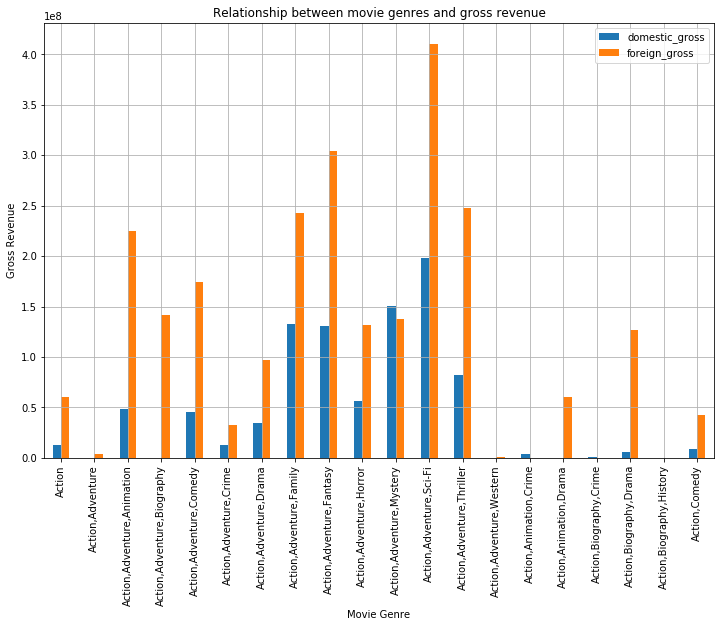

In [101]:
# Plotting a histogram showing the Relationship between movie genres and gross revenue

bgenre = dg.groupby('genres')['domestic_gross','foreign_gross'].mean().head(20).plot.bar( figsize=(12,8), grid=True)
bgenre.set_ylabel('Gross Revenue')
bgenre.set_xlabel('Movie Genre')
bgenre.set_title('Relationship between movie genres and gross revenue')

Text(0.5, 1.0, 'Relationship between movie genres and global gross revenue')

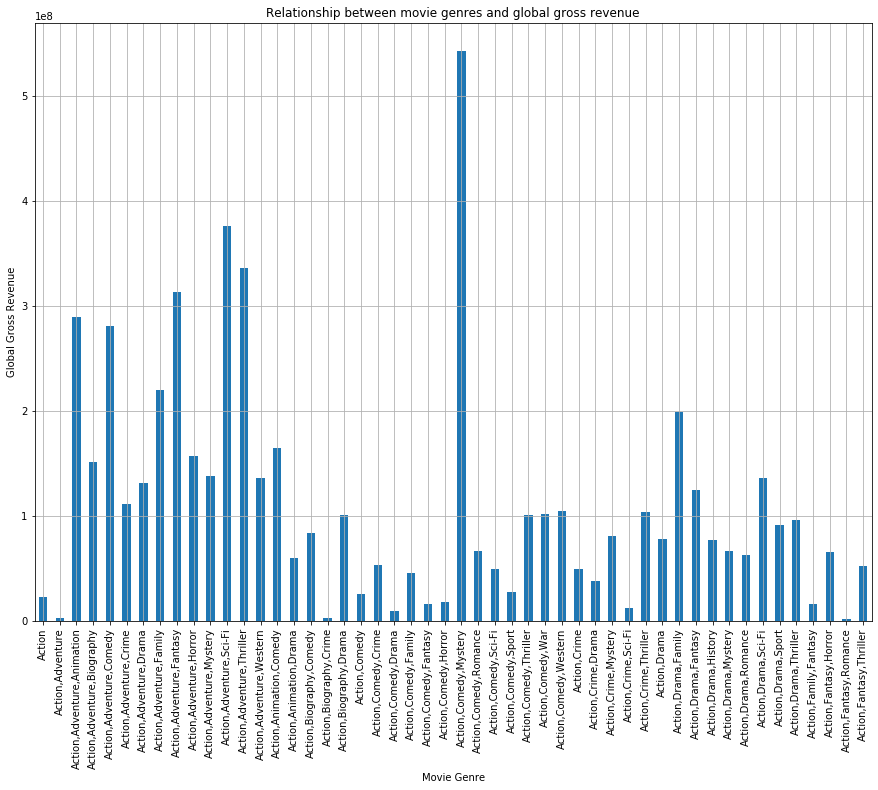

In [44]:
# Plotting a histogram showing the Relationship between movie genres and global gross revenue

fgenre = fg.groupby('genres')['foreign_gross'].mean().head(50).plot.bar( figsize=(15,11), grid=True)
fgenre.set_ylabel('Global Gross Revenue')
fgenre.set_xlabel('Movie Genre')
fgenre.set_title('Relationship between movie genres and global gross revenue')

## Question 2:
 
* Who are the top 5 writers, producers, and directors for top 3 genres? 

In [102]:
# splitting the cast to those worked in movies domestically and those who worked in movies globally using the data already sorted by the gross revenue
# then proceeded to drop missing values based on the proffesion column

cast_d = dg.dropna(subset=['primary_profession'])
cast_f = fg.dropna(subset=['primary_profession'])

In [103]:
# making variables for each important proffession, both domestically and globally

top_producers_domestic = cast_d[cast_d['primary_profession'].str.contains('producer')].head(20)
top_producers_global = cast_f[cast_f['primary_profession'].str.contains('producer')].head(20)

top_writers_domestic = cast_d[cast_d['primary_profession'].str.contains('writer')].head(20)
top_writers_global = cast_f[cast_f['primary_profession'].str.contains('writer')].head(20)

top_directors_domestic = cast_d[cast_d['primary_profession'].str.contains('director')].head(20)
top_directors_global = cast_f[cast_f['primary_profession'].str.contains('director')].head(20)

top_actor_domestic = cast_d[cast_d['primary_profession'].str.contains('actor')].head(20)
top_actor_global = cast_f[cast_f['primary_profession'].str.contains('actor')].head(50)

top_actress_domestic = cast_d[cast_d['primary_profession'].str.contains('actress')].head(20)
top_actress_global = cast_f[cast_f['primary_profession'].str.contains('actress')].head(50)

top_actress_domestic

,primary_title,genres,year,runtime_minutes,primary_name,primary_profession,averagerating,domestic_gross,foreign_gross
436010,Aquaman,"Action,Adventure,Fantasy",2018,143.0,Amber Heard,"actress,producer,soundtrack",7.1,335100000.0,812700000.0
314099,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",2014,144.0,Cate Blanchett,"actress,producer,director",7.4,255100000.0,700900000.0
449925,Maleficent,"Action,Adventure,Family",2014,97.0,Elle Fanning,"actress,soundtrack,producer",7.0,241400000.0,517100000.0
428900,Brave,"Adventure,Animation,Comedy",2012,93.0,Julie Walters,"actress,soundtrack",7.1,237300000.0,303200000.0
530642,Straight Outta Compton,"Biography,Drama,History",2015,147.0,Andrea Berloff,"writer,actress,director",7.9,161200000.0,40400000.0
107087,Daddy's Home,"Drama,Thriller",2015,90.0,Christina Trevino,"actress,writer,director",5.5,150400000.0,92400000.0
287102,Neighbors,Comedy,2014,97.0,Rose Byrne,"actress,soundtrack,producer",6.3,150200000.0,120500000.0
135807,X-Men: First Class,"Action,Adventure,Sci-Fi",2011,131.0,Jennifer Lawrence,"actress,soundtrack,producer",7.7,146400000.0,207200000.0
485465,Rio,Drama,2011,87.0,Olivia Crocicchia,actress,2.6,143600000.0,341000000.0
11339,Split,"Action,Drama,Sport",2017,123.0,Jung-hyun Lee,actress,5.4,138300000.0,140200000.0


In [104]:
top_actor_global = top_actor_global.dropna()

In [105]:
top_actress_global = top_actress_global.dropna()

In [106]:
top_actress_global.isna().any()

primary_title         False
genres                False
year                  False
runtime_minutes       False
primary_name          False
primary_profession    False
averagerating         False
domestic_gross        False
foreign_gross         False
dtype: bool

In [107]:
# finding the best team I need to make a hit action movie both domestically and globally

best_action_producers_domestic = top_producers_domestic[top_producers_domestic['genres'].str.contains('Action')]
best_action_producers_global =  top_producers_global[top_producers_global['genres'].str.contains('Action')]

best_action_writers_domestic = top_writers_domestic[top_writers_domestic['genres'].str.contains('Action')]
best_action_writers_global = top_writers_global[top_writers_global['genres'].str.contains('Action')]

best_action_director_domestic =  top_directors_domestic[top_directors_domestic['genres'].str.contains('Action')]
best_action_directors_global =  top_directors_global[top_directors_global['genres'].str.contains('Action')]

best_action_actors_domestic =  top_actor_domestic[top_actor_domestic['genres'].str.contains('Action')]
best_action_actors_global = top_actor_global[top_actor_global['genres'].str.contains('Action')]

best_action_actress_domestic =  top_actress_domestic[top_actress_domestic['genres'].str.contains('Action')]
best_action_actress_global = top_actress_global[top_actress_global['genres'].str.contains('Action')]

In [108]:
best_action_directors_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
102487,Stanley Tucci,"actor,producer,director"
311801,Ian McShane,"actor,director,producer"
337860,Don Murphy,"producer,actor,director"
366315,Irrfan Khan,"actor,producer,director"
207248,Akiva Goldsman,"producer,writer,director"


In [110]:
best_action_producers_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
302333,Chris Hemsworth,"actor,soundtrack,producer"
419563,Frank Grillo,"actor,producer,executive"
102487,Stanley Tucci,"actor,producer,director"
436010,Amber Heard,"actress,producer,soundtrack"
311801,Ian McShane,"actor,director,producer"


In [112]:
best_action_writers_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
64657,John Logan,"writer,producer,executive"
208488,Jeff Pinkner,"producer,writer,miscellaneous"
207248,Akiva Goldsman,"producer,writer,director"
211268,Steven Spielberg,"producer,writer,director"
524955,T.J. Miller,"actor,writer,producer"


In [113]:
# finding the best team I need to make a hit adventure movie both domestically and globally

best_adventure_producers_domestic = top_producers_domestic[top_producers_domestic['genres'].str.contains('Adventure')]
best_adventure_producers_global =  top_producers_global[top_producers_global['genres'].str.contains('Adventure')]

best_adventure_writers_domestic = top_writers_domestic[top_writers_domestic['genres'].str.contains('Adventure')]
best_adventure_writers_global = top_writers_global[top_writers_global['genres'].str.contains('Adventure')]

best_adventure_director_domestic =  top_directors_domestic[top_directors_domestic['genres'].str.contains('Adventure')]
best_adventure_directors_global =  top_directors_global[top_directors_global['genres'].str.contains('Adventure')]

best_adventure_actors_domestic =  top_actor_domestic[top_actor_domestic['genres'].str.contains('Adventure')]
best_adventure_actors_global = top_actor_global[top_actor_global['genres'].str.contains('Adventure')]

best_adventure_actress_domestic =  top_actress_domestic[top_actress_domestic['genres'].str.contains('Adventure')]
best_adventure_actress_global = top_actress_global[top_actress_global['genres'].str.contains('Adventure')]


In [115]:
best_adventure_producers_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
302333,Chris Hemsworth,"actor,soundtrack,producer"
79315,Jennifer Lee,"writer,miscellaneous,producer"
102487,Stanley Tucci,"actor,producer,director"
73067,Christopher Meledandri,"producer,miscellaneous,executive"
436010,Amber Heard,"actress,producer,soundtrack"


In [116]:
best_adventure_writers_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
79315,Jennifer Lee,"writer,miscellaneous,producer"
64657,John Logan,"writer,producer,executive"
143739,Denis Leary,"writer,actor,producer"
444258,Mike Mitchell,"actor,director,writer"
75467,Cinco Paul,"writer,producer,actor"


In [117]:
best_adventure_directors_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
102487,Stanley Tucci,"actor,producer,director"
311801,Ian McShane,"actor,director,producer"
337860,Don Murphy,"producer,actor,director"
314099,Cate Blanchett,"actress,producer,director"
386762,Carolynne Cunningham,"assistant_director,producer,production_manager"


In [118]:
# finding the best team I need to make a hit Sci-fi movie both domestically and globally

best_scifi_producers_domestic = top_producers_domestic[top_producers_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_producers_global =  top_producers_global[top_producers_global['genres'].str.contains('Sci-Fi')]

best_scifi_writers_domestic = top_writers_domestic[top_writers_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_writers_global = top_writers_global[top_writers_global['genres'].str.contains('Sci-Fi')]

best_scifi_directors_domestic =  top_directors_domestic[top_directors_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_directors_global =  top_directors_global[top_directors_global['genres'].str.contains('Sci-Fi')]

best_scifi_actors_domestic =  top_actor_domestic[top_actor_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_actors_global = top_actor_global[top_actor_global['genres'].str.contains('Sci-Fi')]

best_scifi_actress_domestic =  top_actress_domestic[top_actress_domestic['genres'].str.contains('Sci-Fi')]
best_scifi_actress_global = top_actress_global[top_actress_global['genres'].str.contains('Sci-Fi')]

best_action_actors_global

,primary_title,genres,year,runtime_minutes,primary_name,primary_profession,averagerating,domestic_gross,foreign_gross
302333,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,141.0,Chris Hemsworth,"actor,soundtrack,producer",7.3,459000000.0,946400000.0
493364,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,128.0,Rafe Spall,actor,6.2,417700000.0,891800000.0
419563,Wolf Warrior 2,"Action,Drama,Thriller",2017,123.0,Frank Grillo,"actor,producer,executive",6.2,2700000.0,867600000.0
102487,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",2014,165.0,Stanley Tucci,"actor,producer,director",5.7,245400000.0,858600000.0
311801,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",2011,136.0,Ian McShane,"actor,director,producer",6.6,241100000.0,804600000.0
337860,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",2011,154.0,Don Murphy,"producer,actor,director",6.2,352400000.0,771400000.0
310324,Operation Red Sea,"Action,Drama,Thriller",2018,142.0,Johnny Huang,actor,6.7,1500000.0,577700000.0
366315,The Amazing Spider-Man,"Action,Adventure,Sci-Fi",2012,136.0,Irrfan Khan,"actor,producer,director",7.0,262000000.0,495900000.0
347562,Deadpool 2,"Action,Adventure,Comedy",2018,119.0,Ryan Reynolds,"actor,producer,soundtrack",7.8,318500000.0,460500000.0
524955,Big Hero 6,"Action,Adventure,Animation",2014,102.0,T.J. Miller,"actor,writer,producer",7.8,222500000.0,435300000.0


In [119]:
best_scifi_writers_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
208488,Jeff Pinkner,"producer,writer,miscellaneous"
207248,Akiva Goldsman,"producer,writer,director"
211268,Steven Spielberg,"producer,writer,director"
492334,Jon Hoeber,"writer,producer,miscellaneous"
364604,Wai Lun Ng,"writer,assistant_director,miscellaneous"


In [127]:
best_scifi_directors_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
102487,Stanley Tucci,"actor,producer,director"
337860,Don Murphy,"producer,actor,director"
366315,Irrfan Khan,"actor,producer,director"
207248,Akiva Goldsman,"producer,writer,director"
211268,Steven Spielberg,"producer,writer,director"


In [126]:
best_scifi_producers_global.loc[:,['primary_name','primary_profession']].head(5)

,primary_name,primary_profession
302333,Chris Hemsworth,"actor,soundtrack,producer"
102487,Stanley Tucci,"actor,producer,director"
337860,Don Murphy,"producer,actor,director"
208488,Jeff Pinkner,"producer,writer,miscellaneous"


## Question 3:

* What's the relationship between the age of a crew member and the rating of a movie? 

In [128]:
# finding the sum of the missing values

sum(imdbandgross.birth_year.isna())

695

In [129]:
# dropping empty values for the column needed

crew_age = imdbandgross.dropna(subset = ['birth_year'])

In [144]:
crew_age.loc[:,['primary_name', 'birth_year', 'primary_profession']]

,primary_name,birth_year,primary_profession
0,Christopher Walken,1943.0,"actor,soundtrack,miscellaneous"
896,Edward Shearmur,1966.0,"composer,music_department,soundtrack"
1936,Paul Schneider,1976.0,"actor,writer,soundtrack"
2286,Olivia Munn,1980.0,"actress,writer"
3207,Jason Blum,1969.0,"producer,executive,actor"
...,...,...,...
538573,Jonathan Pryce,1947.0,"actor,soundtrack"
539081,Pawel Edelman,1958.0,"cinematographer,camera_department,actor"
539561,René Angélil,1942.0,"actor,writer,producer"
539585,Eugen Schlegel,1975.0,"cinematographer,director,producer"


In [131]:
# dropping empty values for the column needed

crew_age = crew_age.dropna(subset = ['primary_profession'] )

In [140]:
crew_age.columns

Index(['tconst', 'directors', 'writers', 'averagerating', 'numvotes',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'ordering_x', 'nconst', 'category', 'job', 'characters',
       'primary_name', 'birth_year', 'death_year', 'primary_profession',
       'known_for_titles', 'title_id', 'ordering_y', 'title_x', 'region',
       'language', 'types', 'attributes', 'is_original_title', 'title_y',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [133]:
# dropping rnadom characters like ,

crew_age['foreign_gross'] = crew_age.foreign_gross.replace(',','', regex=True).astype(float)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
# extracting the crew members of the movies and making a variable for their inidividual profession

writers_age = crew_age[crew_age['primary_profession'].str.contains('writer')]
producers_age = crew_age[crew_age['primary_profession'].str.contains('producer')]
directors_age = crew_age[crew_age['primary_profession'].str.contains('director')]
actors_age = crew_age[crew_age['primary_profession'].str.contains('actor')]
actress_age = crew_age[crew_age['primary_profession'].str.contains('actress')]

In [ ]:
crew_age['primary_profession']

[Text(0, 0.5, 'Birth Year'),
 Text(0.5, 0, 'Movie Review'),
 Text(0.5, 1.0, 'Writers Birth Year vs Movie Rating')]

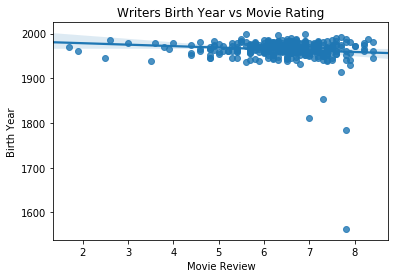

In [136]:
#Plot a graph showing the relationship between the birth year of the writers vs the movie ratings

wr = sns.regplot(x='averagerating', y='birth_year', data = writers_age ,fit_reg=True)
wr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Writers Birth Year vs Movie Rating')

In [147]:
from scipy.stats import linregress
a = writers_age['birth_year']
b = writers_age['averagerating']
linregress(a, b)

LinregressResult(slope=-0.003919433630265634, intercept=14.14276802500058, rvalue=-0.11319272740898703, pvalue=0.03668235709669468, stderr=0.0018685500896753662)

[Text(232.61818181818177, 0.5, 'Birth Year'),
 Text(0.5, 15.0, 'Movie Review'),
 Text(0.5, 1, 'Diretors Birth Year vs Movie Rating')]

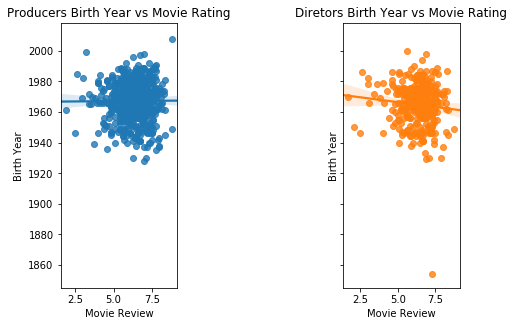

In [137]:
#Plot a graph showing the relationship between the birth year of the producer and directors vs the movie ratings

fig, (pr, dr) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='averagerating', y='birth_year', data = producers_age ,fit_reg=True, ax=pr)
pr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Producers Birth Year vs Movie Rating')

sns.regplot(x='averagerating', y='birth_year', data = directors_age ,fit_reg=True, ax=dr)
dr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Diretors Birth Year vs Movie Rating')

In [148]:
from scipy.stats import linregress
c = producers_age['birth_year']
d = producers_age['averagerating']
linregress(c, d)

LinregressResult(slope=0.0005273153597410282, intercept=5.263168810050276, rvalue=0.006497672229573484, pvalue=0.8754902935376061, stderr=0.0033638913600956164)

In [149]:
from scipy.stats import linregress
e = directors_age['birth_year']
f = directors_age['averagerating']
linregress(e, f)

LinregressResult(slope=-0.006958644668653937, intercept=19.998374877943057, rvalue=-0.09371434089492311, pvalue=0.08967941392712009, stderr=0.00408817272476974)

[Text(232.61818181818177, 0.5, 'Birth Year'),
 Text(0.5, 15.0, 'Movie Review'),
 Text(0.5, 1, 'Actress Birth Year vs Movie Rating')]

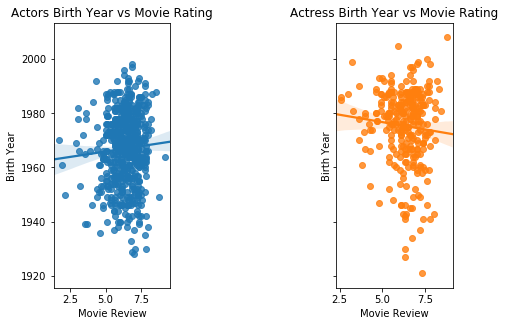

In [138]:
#Plot a graph showing the relationship between the birth year of an actor/actress vs the movie ratings

fig, (ar, arr) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='averagerating', y='birth_year', data = actors_age ,fit_reg=True, ax=ar)
ar.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Actors Birth Year vs Movie Rating')

#Plot a graph showing the relationship between the birth year of the actress and the average rating of the movie

sns.regplot(x='averagerating', y='birth_year', data = actress_age ,fit_reg=True, ax=arr)
arr.set(ylabel='Birth Year', xlabel='Movie Review', title = 'Actress Birth Year vs Movie Rating')


In [150]:
from scipy.stats import linregress
i = actors_age['birth_year']
j = actors_age['averagerating']
linregress(i, j)

LinregressResult(slope=0.00439073378707319, intercept=-2.283538719871225, rvalue=0.05881834100300703, pvalue=0.15823783723709567, stderr=0.003107691276073737)

In [151]:
from scipy.stats import linregress
g = actress_age['birth_year']
h = actress_age['averagerating']
linregress(g, h)

LinregressResult(slope=-0.0059485972160819595, intercept=18.05891005745665, rvalue=-0.08023284505854296, pvalue=0.16931429359372632, stderr=0.004317438880389363)

## Question 4:

* What's the relationship between the gender of the protagonist in an action movie and the gross revenue of that movie?

In [1005]:
best_action_actors_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 270 to 290
Data columns (total 9 columns):
primary_title           22 non-null object
genres                  22 non-null object
year                    22 non-null int64
runtime_minutes         22 non-null float64
primary_name_y          22 non-null object
primary_profession_y    22 non-null object
averagerating           22 non-null float64
domestic_gross          22 non-null float64
foreign_gross           22 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ KB


In [1058]:
best_action_actress_global

,primary_title,genres,year,runtime_minutes,primary_name_y,primary_profession_y,averagerating,domestic_gross,foreign_gross
372,Captain America: Civil War,"Action,Adventure,Sci-Fi",2016,147.0,Scarlett Johansson,"actress,soundtrack,producer",7.8,408100000.0,745200000.0
380,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",2016,133.0,Felicity Jones,"actress,producer,soundtrack",7.8,532200000.0,523900000.0
539,Maleficent,"Action,Adventure,Family",2014,97.0,Elle Fanning,"actress,soundtrack,producer",7.0,241400000.0,517100000.0
326,Prince of Persia: The Sands of Time,"Action,Adventure,Fantasy",2010,116.0,Gemma Arterton,"actress,soundtrack,producer",6.6,90800000.0,245600000.0
93,X-Men: First Class,"Action,Adventure,Sci-Fi",2011,131.0,Jennifer Lawrence,"actress,soundtrack,producer",7.7,146400000.0,207200000.0
269,After Earth,"Action,Adventure,Drama",2013,100.0,Sophie Okonedo,actress,4.8,60500000.0,183300000.0
674,The Bourne Legacy,"Action,Adventure,Thriller",2012,135.0,Rachel Weisz,"actress,producer,soundtrack",6.7,113200000.0,162900000.0
525,The Sorcerer's Apprentice,"Action,Adventure,Family",2010,109.0,Teresa Palmer,"actress,producer,writer",6.1,63200000.0,152100000.0
195,Baby Driver,"Action,Crime,Drama",2017,113.0,Eiza González,"actress,soundtrack,music_department",7.6,107800000.0,119100000.0
642,Mechanic: Resurrection,"Action,Adventure,Thriller",2016,98.0,Jessica Alba,"actress,cinematographer,producer",5.7,21200000.0,104500000.0


In [152]:
# Merging the two databases using an outer join in order to group

gen = pd.merge(best_action_actors_global, best_action_actress_global, how='outer')

In [1017]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 9 columns):
primary_title           37 non-null object
genres                  37 non-null object
year                    37 non-null int64
runtime_minutes         37 non-null float64
primary_name_y          37 non-null object
primary_profession_y    37 non-null object
averagerating           37 non-null float64
domestic_gross          37 non-null float64
foreign_gross           37 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.9+ KB


In [153]:
# Using a lambda function to create a new column that say if the cast member is an actor or actress

gen['Actor/Actress'] = gen['primary_profession'].map(lambda x: 'Female' if 'actress' in x else 'Male')

In [159]:
gen.loc[:,['primary_name', 'Actor/Actress']]

,primary_name,Actor/Actress
0,Chris Hemsworth,Male
1,Rafe Spall,Male
2,Frank Grillo,Male
3,Stanley Tucci,Male
4,Ian McShane,Male
5,Don Murphy,Male
6,Johnny Huang,Male
7,Irrfan Khan,Male
8,Ryan Reynolds,Male
9,T.J. Miller,Male


In [155]:
# Grouping the casts by their gender

gend = gen.groupby(gen['Actor/Actress']).mean()

In [156]:
gend

,year,runtime_minutes,averagerating,domestic_gross,foreign_gross
Actor/Actress,,,,,
Female,2014.588235,120.823529,6.488235,9.227165e+07,2.243471e+08
Male,2014.250000,124.583333,6.608333,1.823542e+08,4.709333e+08


Text(0.5, 1.0, 'Relationship between the gender of the lead act and the gross revenue')

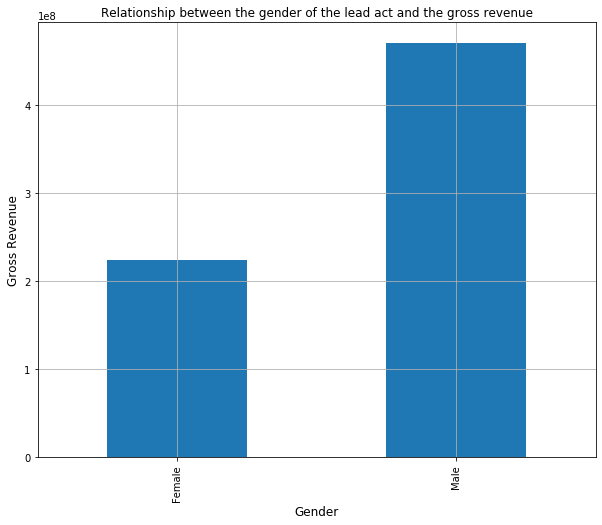

In [161]:
# Plotting a histogram showing the Relationship between movie genres and gross revenue

gender = gend['foreign_gross'].plot.bar(figsize=(10,8), grid=True)
gender.set_ylabel('Gross Revenue', fontsize=12)
gender.set_xlabel('Gender', fontsize=12)
gender.set_title('Relationship between the gender of the lead act and the gross revenue',fontsize=12)

## Question 5:

* What's the relationship between the length of a movie and the gross revenue/rating of that movie?

In [180]:
dg = dg.dropna(subset=['runtime_minutes'])

In [181]:
dg = dg.dropna(subset=['averagerating'])

In [187]:
fg = fg.dropna(subset=['runtime_minutes'])

In [188]:
fg = fg.dropna(subset=['averagerating'])

In [194]:
fg = fg.dropna(subset=['domestic_gross']) 

[Text(232.61818181818177, 0.5, 'Rating'),
 Text(0.5, 15.0, 'Movie Length'),
 Text(0.5, 1, 'Movie length vs Movie Ratings Globally')]

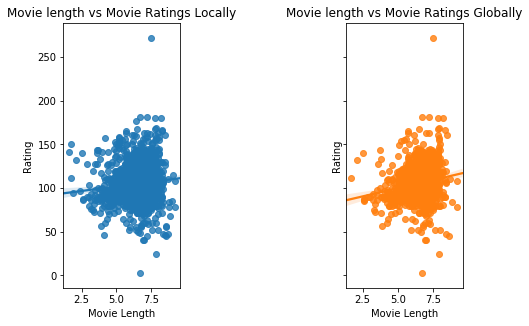

In [189]:
# finding the Relationship between the length of a movie and the ratings of that movie, both domestically and globally

import seaborn as sns


fig, (dggraph, fggraph) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='averagerating', y='runtime_minutes', data = dg ,fit_reg=True, ax=dggraph)
dggraph.set(ylabel='Rating', xlabel='Movie Length', title = 'Movie length vs Movie Ratings Locally')

sns.regplot(x='averagerating', y='runtime_minutes', data =fg, fit_reg=True, ax=fggraph)
fggraph.set(ylabel='Rating', xlabel='Movie Length', title = 'Movie length vs Movie Ratings Globally')



In [190]:
from scipy.stats import linregress
m = dg['averagerating']
n = dg['runtime_minutes']
linregress(m, n)

LinregressResult(slope=2.0614779649029598, intercept=91.53496144515476, rvalue=0.10602051197261811, pvalue=6.672049469463463e-06, stderr=0.4563540837420618)

In [191]:
from scipy.stats import linregress
o = fg['averagerating']
t = fg['runtime_minutes']
linregress(o, t)

LinregressResult(slope=3.7668173611992164, intercept=81.03848025510548, rvalue=0.18828822148677696, pvalue=1.8955923586850196e-09, stderr=0.6213169909798563)

In [195]:
from scipy.stats import linregress
p = fg['domestic_gross']
q = fg['runtime_minutes']
linregress(p, q)

LinregressResult(slope=2.2517561110389902e-08, intercept=104.20127256439669, rvalue=0.07643039666767079, pvalue=0.016430487360957362, stderr=9.36928111266336e-09)

In [193]:
from scipy.stats import linregress
y = fg['foreign_gross']
z = fg['runtime_minutes']
linregress(y, z)

LinregressResult(slope=2.522341924611583e-08, intercept=103.37901284286956, rvalue=0.16695825758322527, pvalue=1.0623828829570053e-07, stderr=4.71039250663227e-09)

[Text(232.61818181818177, 0.5, 'Gross'),
 Text(0.5, 15.0, 'Movie Length'),
 Text(0.5, 1, 'Movie length vs Movie Revenue Globally')]

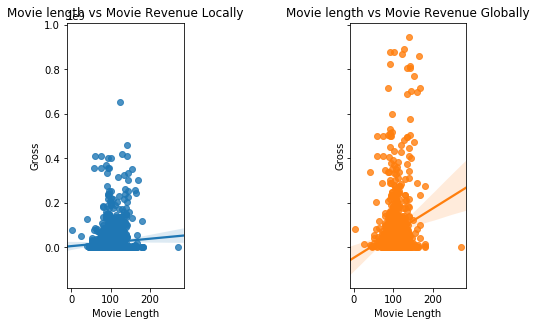

In [168]:
# finding the Relationship between the length of a movie and the gross revenue of that movie, both domestically and globally

fig, (dggross_graph, fggross_graph) = plt.subplots(ncols=2, sharey=True)
plt.tight_layout(pad=0.1, w_pad=15, h_pad=0.9)


sns.regplot(x='runtime_minutes', y='domestic_gross',  data = dg, fit_reg=True, ax=dggross_graph)
dggross_graph.set(ylabel='Gross', xlabel='Movie Length', title = 'Movie length vs Movie Revenue Locally')

sns.regplot(y='foreign_gross',x='runtime_minutes', data =fg, fit_reg=True, ax=fggross_graph)
fggross_graph.set(ylabel='Gross', xlabel='Movie Length', title = 'Movie length vs Movie Revenue Globally')

## Question 6:


* What's the relationship between the movie release month and the gross revenue/rating of a movie? 

In [226]:
tn.release_date.dtype

dtype('O')

In [227]:
tn['release_date'].astype(int)

ValueError: invalid literal for int() with base 10: 'Dec 18, 2009'

In [228]:
# Extracting the month into its own seperate column using the tmdb

tn['Release_month'] = pd.DatetimeIndex(tn['release_date']).month

In [229]:
# Extracting the days into its own seperate column using the tmdb

tn['Release_day'] = pd.DatetimeIndex(tn['release_date']).day

In [230]:
tn['Release_day']

0       18
1       20
2        7
3        1
4       15
        ..
5777    31
5778     2
5779    13
5780    29
5781     5
Name: Release_day, Length: 5782, dtype: int64

In [232]:
import calendar
tn['Release_month'] = tn['Release_month'].apply(lambda x: calendar.month_abbr[x])

In [233]:
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_month,Release_day
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec,15
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec,31
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep,29


In [235]:
# cleaning the columns I need by replacing the $ and , in the domestic_gross, worldwide_gross $ production_budget columns

tn['domestic_gross'] = tn.domestic_gross.str.replace('$', '')
tn['worldwide_gross'] = tn.worldwide_gross.str.replace('$', '')
tn['worldwide_gross'] = tn.worldwide_gross.str.replace(',', '')
tn['production_budget'] = tn.production_budget.str.replace('$', '')
tn['production_budget'] = tn.production_budget.str.replace(',', '')

In [236]:
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_month,Release_day
0,1,"Dec 18, 2009",Avatar,425000000,"760,507,625",2776345279,Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"241,063,875",1045663875,May,20
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"42,762,350",149762350,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"459,005,868",1403013963,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"620,181,382",1316721747,Dec,15
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Dec,31
5778,79,"Apr 2, 1999",Following,6000,"48,482",240495,Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"1,338",1338,Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Sep,29


In [240]:
# changing the needed columns into a float data type

tn['production_budget'] = tn['production_budget'].astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].astype(float)

In [265]:
tn['worldwide_gross'].astype(float)

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [266]:
tn.groupby(tn['Release_month']).mean()

,id,production_budget,worldwide_gross,Release_day
Release_month,,,,
Apr,51.121145,2.380283e+07,5.992026e+07,15.451542
Aug,52.475806,2.555609e+07,6.097841e+07,15.649194
Dec,50.787919,3.325161e+07,1.016932e+08,20.422819
Feb,50.650510,2.804642e+07,7.154453e+07,14.196429
Jan,50.060519,2.084349e+07,4.656382e+07,16.391931
Jul,50.104545,4.254616e+07,1.409636e+08,16.513636
Jun,50.102296,4.309912e+07,1.425230e+08,16.405010
Mar,49.917021,3.078208e+07,8.063337e+07,15.887234
May,50.555283,4.713520e+07,1.622680e+08,15.933661


In [272]:
tn.groupby(tn['Release_month']).mean().iloc[:,0:3].sort_values([ "worldwide_gross" ], axis=0, ascending=False, inplace=False)

,id,production_budget,worldwide_gross
Release_month,,,
May,50.555283,4.713520e+07,1.622680e+08
Jun,50.102296,4.309912e+07,1.425230e+08
Jul,50.104545,4.254616e+07,1.409636e+08
Nov,50.043210,4.260006e+07,1.357416e+08
Dec,50.787919,3.325161e+07,1.016932e+08
Mar,49.917021,3.078208e+07,8.063337e+07
Feb,50.650510,2.804642e+07,7.154453e+07
Aug,52.475806,2.555609e+07,6.097841e+07
Apr,51.121145,2.380283e+07,5.992026e+07


Text(0.5, 1.0, 'Relationship between the release month and the gross revenue of a movie')

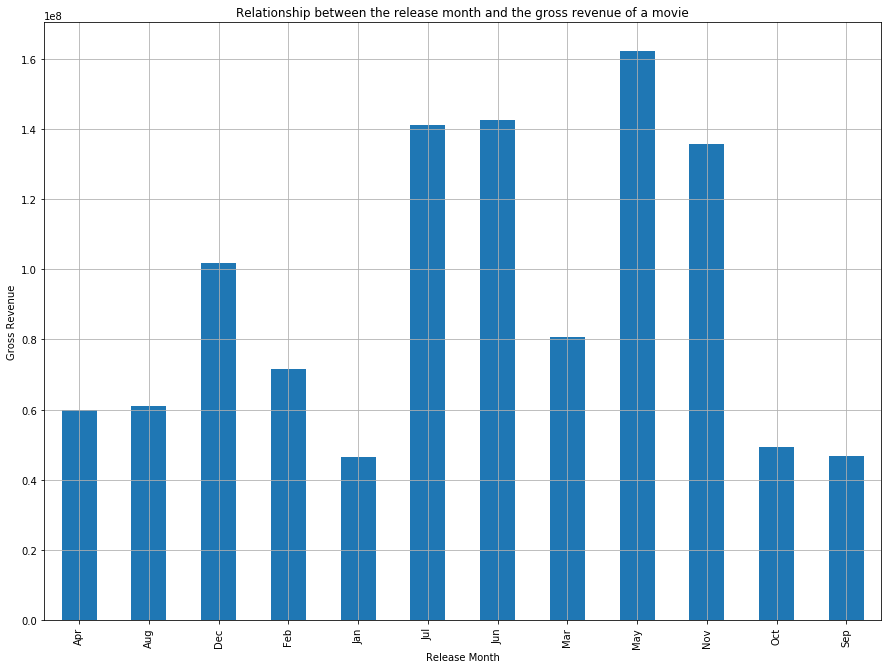

In [248]:
ax = tn.groupby('Release_month')['worldwide_gross'].mean().plot.bar( figsize=(15,11), grid=True)
ax.set_ylabel('Gross Revenue')
ax.set_xlabel('Release Month')
ax.set_title('Relationship between the release month and the gross revenue of a movie')